# Ridge Regression
Modified Loss function:
$\\ L(w) = (y - Xw)^T (y - Xw) + \lambda w^T w $
$\lambda > 0$ as a tunable hyperparameter

In [6]:
from random import sample 
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
# read cars dataset
cars = pd.read_csv('/Users/WoodPecker/PycharmProjects/JupyterProject/auto-mpg.data.txt', header=None, sep='\s+')


## Sample Data
random sample data consisting of 20 cars

In [7]:
# random sample of 20 cars
sample = sample(range(0,len(cars)), 10)
out_of_sample = list(set(range(0,len(cars))) - set(sample))

# extract mpg values for cars in sample
y = cars.iloc[sample, 0].values
y_oos = cars.iloc[out_of_sample, 0].values
# extract horsepower values for cars in sample
X = cars.iloc[sample, [3]].values
X.reshape(X.size, 1)

array([[150.],
       [100.],
       [ 81.],
       [ 75.],
       [100.],
       [ 63.],
       [ 95.],
       [105.],
       [ 97.],
       [ 69.]])

## Polynomial Regression of degree 5
To estimate the coefficients $w_i$, we can precompute the values $x_i$ and treat them just like other numerical features
– no other changes are required!

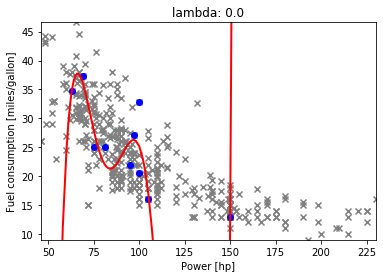

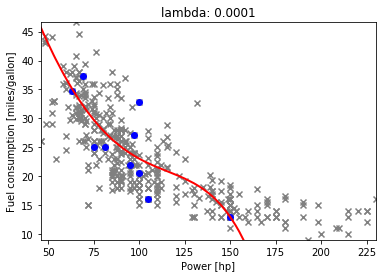

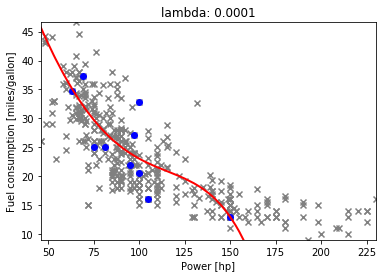

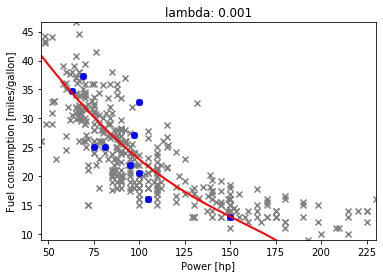

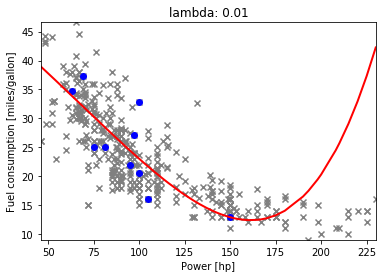

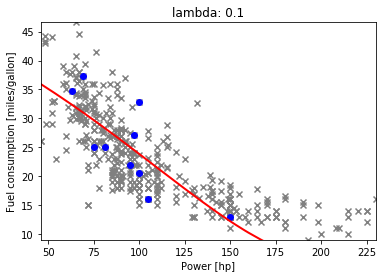

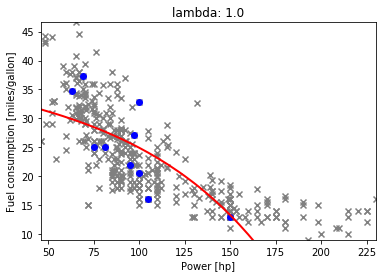

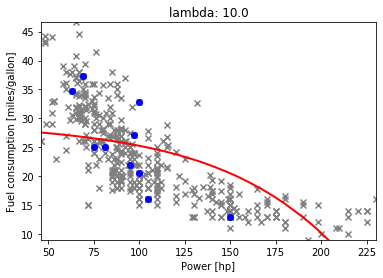

In [8]:
# precompute polynomial features for degree 5
poly = preprocessing.PolynomialFeatures(5)
Xp = poly.fit_transform(X)
for lmbd in [0.0, 0.0001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]:
    
    # fit linear regression model
    reg = linear_model.Ridge(alpha=lmbd, normalize=True)
    reg.fit(Xp,y)
    
    # plot fitted function
    hp = cars.iloc[:,3].values
    mpg = cars.iloc[:,0].values
    hps = np.array(sorted(hp))
    hps = hps.reshape(hps.size, 1)
    hpsp = poly.fit_transform(hps)
    plt.title("lambda: " + str(lmbd))
    plt.scatter(hp, mpg, color='gray', marker='x')
    plt.scatter(X, y, color='blue', marker='o')
    plt.plot(hps, reg.predict(hpsp), color='red', lw=2)
    plt.xlabel('Power [hp]')
    plt.ylabel('Fuel consumption [miles/gallon]')
    plt.xlim([min(hp), max(hp)])
    plt.ylim([min(mpg), max(mpg)])
    plt.show()